In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
#Load the main dataset
data = pd.read_csv("/files/capstone_project/principal_dataset.csv", sep=';', engine = 'python')

In [3]:
data.columns

Index(['Ticker', 'Name', 'Sector', 'Industry', 'ESG Global Score',
       'Market Cap', 'Size', 'Debt-to-Equity', 'PE_Ratio', 'Beta_Value',
       'Year', 'ROE_Value', 'Tot_Return', 'Next_Year_Return', 'Momentum_1y',
       'High_Impact_ESG', 'ESG_x_Sector'],
      dtype='object')

In [5]:
data.dtypes

Ticker               object
Name                 object
Sector               object
Industry             object
ESG Global Score    float64
Market Cap           object
Size                float64
Debt-to-Equity      float64
PE_Ratio            float64
Beta_Value          float64
Year                float64
ROE_Value           float64
Tot_Return          float64
Next_Year_Return    float64
Momentum_1y         float64
High_Impact_ESG       int64
ESG_x_Sector         object
dtype: object

In [3]:
cols = ["ESG Global Score", "Tot_Return", "Next_Year_Return", "Size", "PE_Ratio", "Debt-to-Equity", "ROE_Value", "Beta_Value", "Momentum_1y"]

for col in cols:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

In [6]:
#Descriptive statistics

data[["ESG Global Score", "Tot_Return", "Next_Year_Return", "Size", "PE_Ratio", "Debt-to-Equity", "ROE_Value", "Beta_Value"]].describe()

,ESG Global Score,Tot_Return,Next_Year_Return,Size,PE_Ratio,Debt-to-Equity,ROE_Value,Beta_Value
count,4475.000000,4451.000000,3976.000000,4466.000000,4312.000000,4120.000000,4180.000000,4477.000000
mean,61.263180,15.595039,16.958186,10.438617,28.141315,190.967598,49.449226,0.965389
std,17.117471,36.341932,37.286429,0.482467,53.472669,1287.430081,886.564551,0.421817
min,4.763609,-88.828771,-71.396908,7.312575,0.742822,0.000000,-24850.000000,-0.074472
25%,49.570276,-4.582101,-3.475004,10.104569,14.642605,40.826628,8.650554,0.658228
50%,64.419102,13.598800,14.895194,10.367655,19.979984,74.517255,15.388915,0.994993
75%,74.288978,31.057241,32.956162,10.700051,28.166291,131.143383,26.966945,1.226096
max,93.303892,743.436999,743.436999,12.575938,1791.581383,42210.000000,31560.000000,3.684074


In [4]:
#We can see that there are some outliers in several variables, I decided to winzorize them

from scipy.stats.mstats import winsorize

wins_col = ["Tot_Return", "Next_Year_Return", "Size", "PE_Ratio", "Debt-to-Equity", "ROE_Value", "Momentum_1y"]

for col in wins_col:
    data[col + "_w"] = data.groupby("Sector")[col].transform(
        lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99))
    )

In [5]:
#Look at the descriptive statistics after winzorization

data[[col + "_w" for col in wins_col]].describe()

,Tot_Return_w,Next_Year_Return_w,Size_w,PE_Ratio_w,Debt-to-Equity_w,ROE_Value_w,Momentum_1y_w
count,4451.000000,3976.000000,4466.000000,4312.000000,4120.000000,4180.000000,3951.000000
mean,15.055467,16.369259,10.439732,26.400116,138.539508,27.223690,16.487916
std,30.949855,31.631301,0.473860,24.931289,303.389397,80.471544,29.786784
min,-60.671793,-61.615464,9.210686,3.804624,0.000000,-237.903499,-58.930824
25%,-4.582101,-3.475004,10.104569,14.642605,40.879195,8.650554,-2.291866
50%,13.598800,14.895194,10.367655,19.979984,74.517255,15.388915,14.843303
75%,31.057241,32.956162,10.700051,28.166291,131.143383,26.966945,32.216727
max,230.081136,239.107859,12.231571,253.151394,8014.507955,1770.972624,209.826059


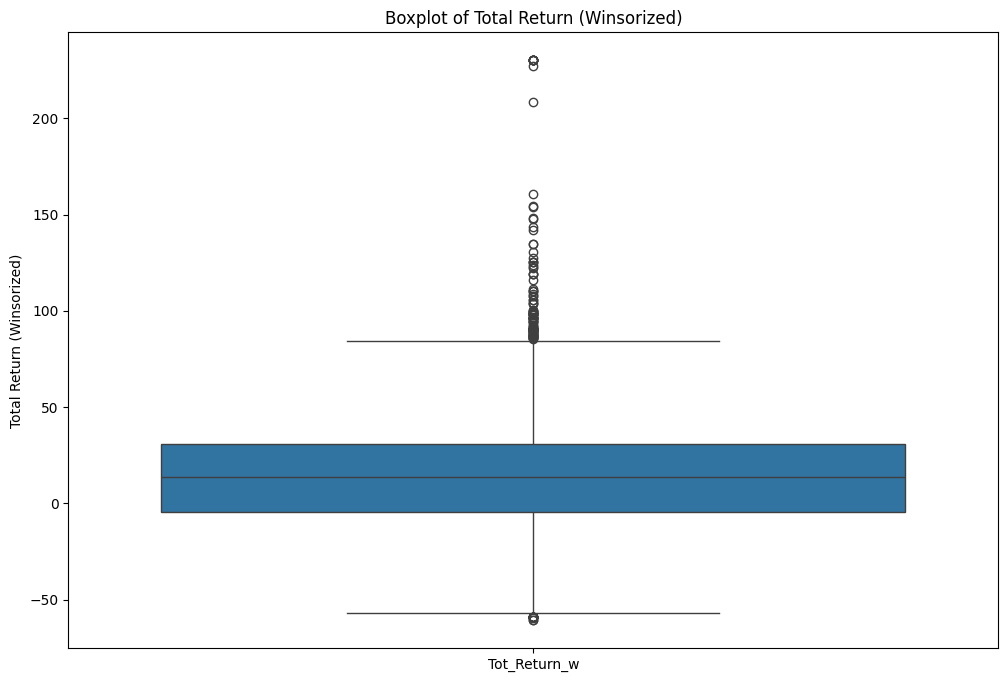

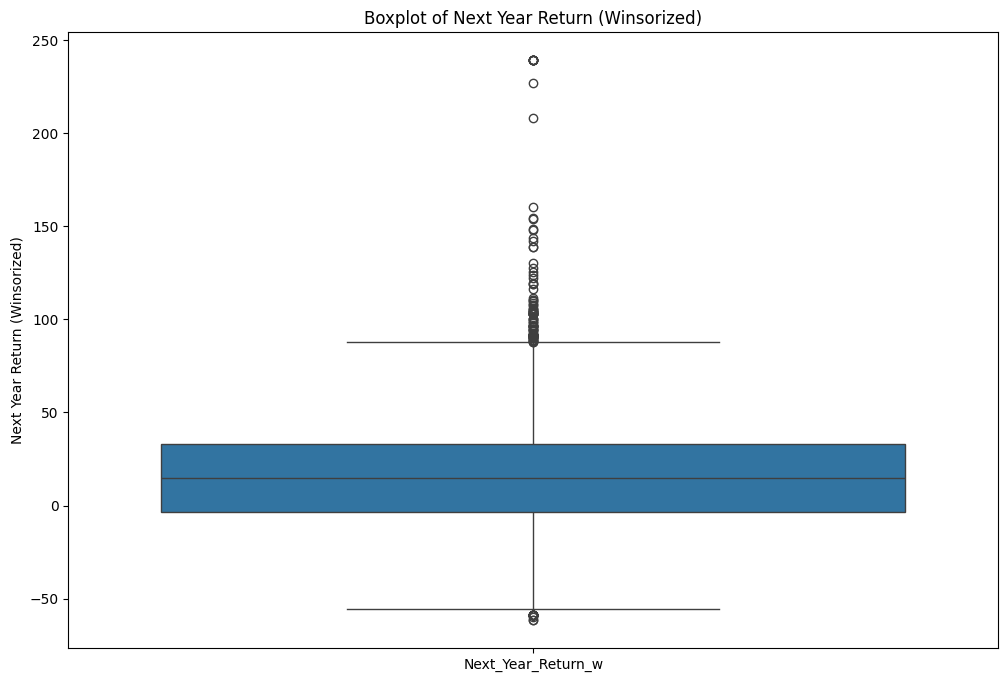

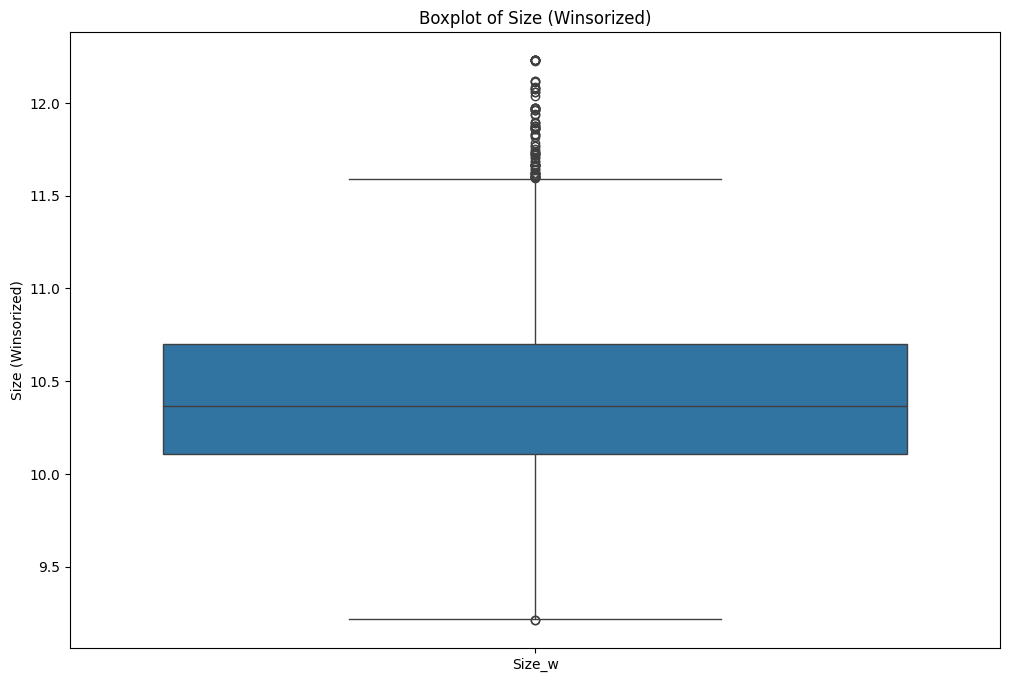

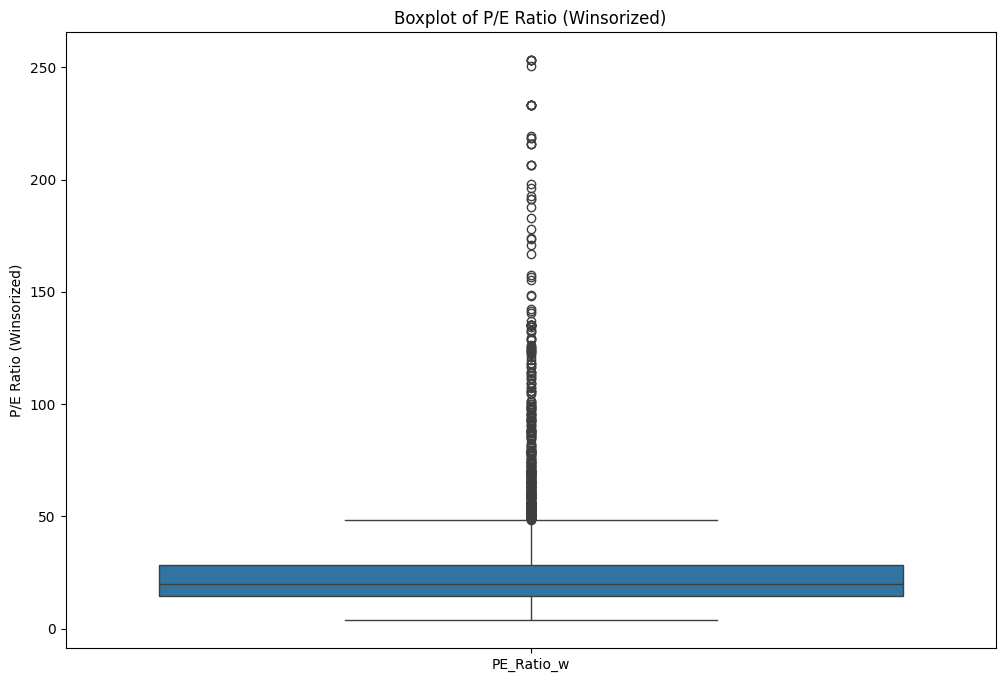

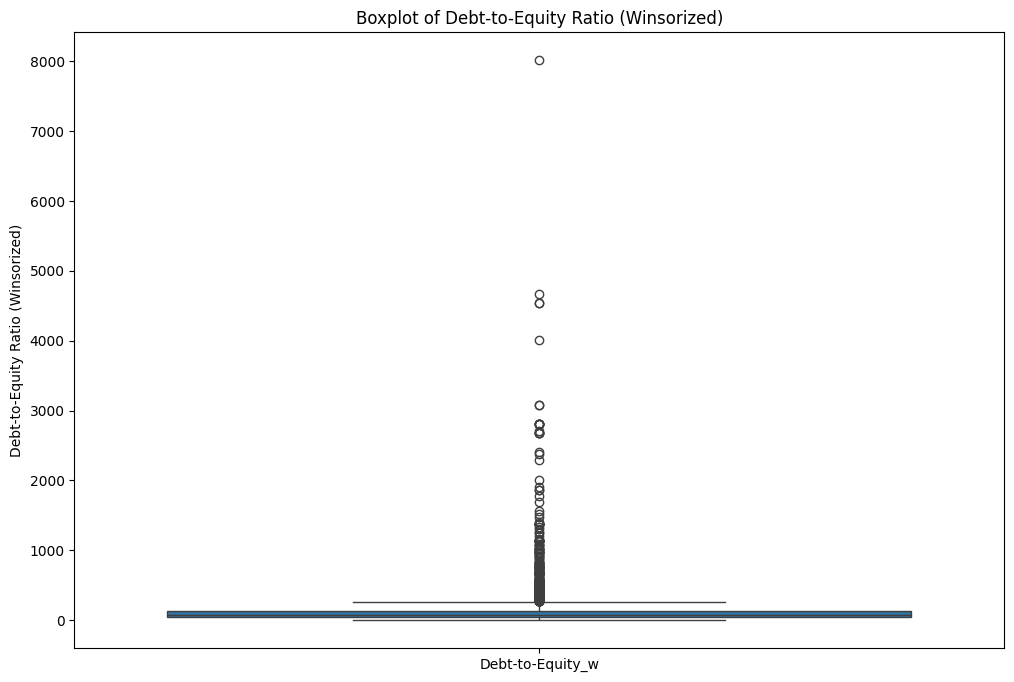

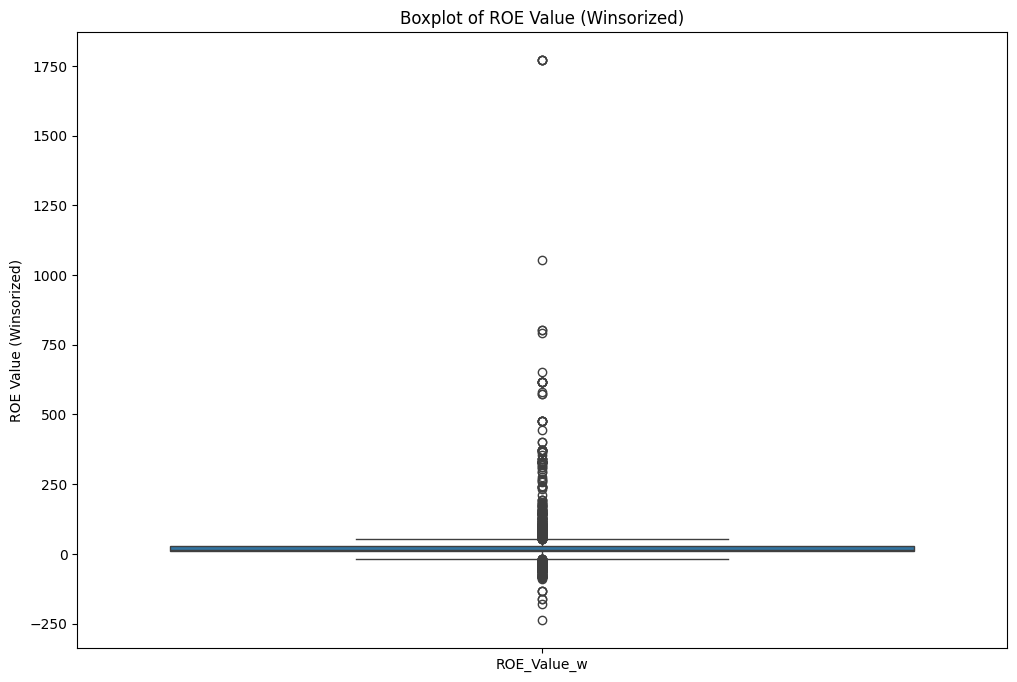

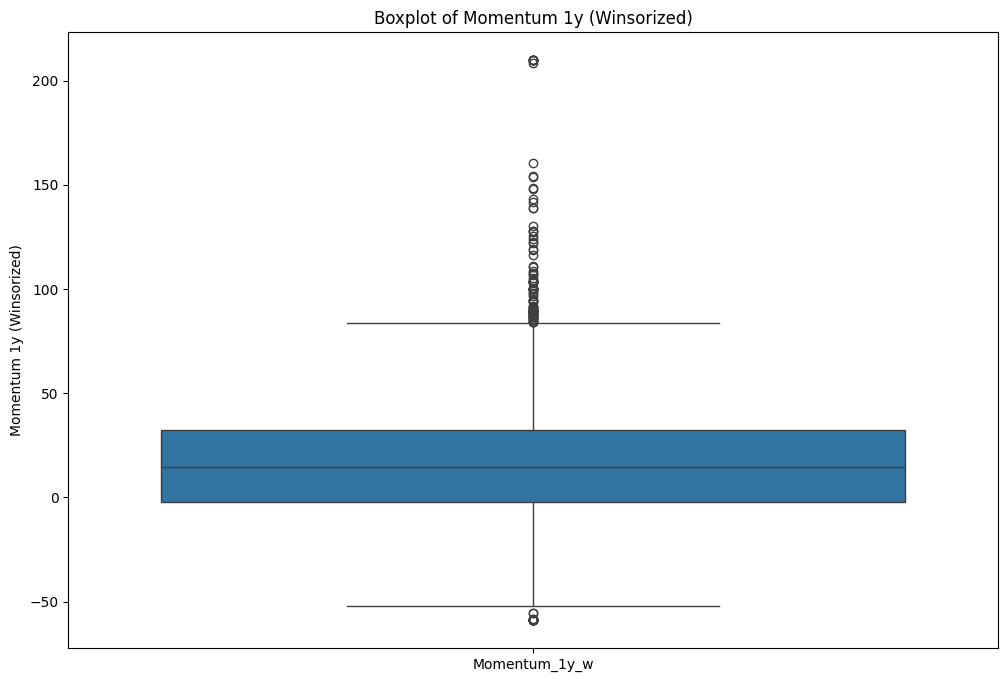

In [18]:
#Let's visualize the boxplots after winzorization

plt.figure(figsize=(12, 8))
bp_tot_return_w = sns.boxplot(data = data[["Tot_Return_w"]])
plt.ylabel("Total Return (Winsorized)")
plt.title("Boxplot of Total Return (Winsorized)")   
plt.show()

plt.figure(figsize=(12, 8))
bp_next_year_return_w = sns.boxplot(data = data[["Next_Year_Return_w"]])
plt.ylabel("Next Year Return (Winsorized)")  
plt.title("Boxplot of Next Year Return (Winsorized)")
plt.show()

plt.figure(figsize=(12, 8))
bp_size_w = sns.boxplot(data = data[["Size_w"]])
plt.ylabel("Size (Winsorized)")
plt.title("Boxplot of Size (Winsorized)")
plt.show()

plt.figure(figsize=(12, 8))
bp_pe_ratio_w = sns.boxplot(data = data[["PE_Ratio_w"]])
plt.ylabel("P/E Ratio (Winsorized)")
plt.title("Boxplot of P/E Ratio (Winsorized)")
plt.show()

plt.figure(figsize=(12, 8))
bp_debt_to_equity_w = sns.boxplot(data = data[["Debt-to-Equity_w"]])
plt.ylabel("Debt-to-Equity Ratio (Winsorized)")
plt.title("Boxplot of Debt-to-Equity Ratio (Winsorized)")
plt.show()

plt.figure(figsize=(12, 8))
bp_roe_value_w = sns.boxplot(data = data[["ROE_Value_w"]])
plt.ylabel("ROE Value (Winsorized)")
plt.title("Boxplot of ROE Value (Winsorized)")
plt.show()

plt.figure(figsize=(12, 8))
bp_momentum_1y_w = sns.boxplot(data = data[["Momentum_1y_w"]])
plt.ylabel("Momentum 1y (Winsorized)")
plt.title("Boxplot of Momentum 1y (Winsorized)")
plt.show()



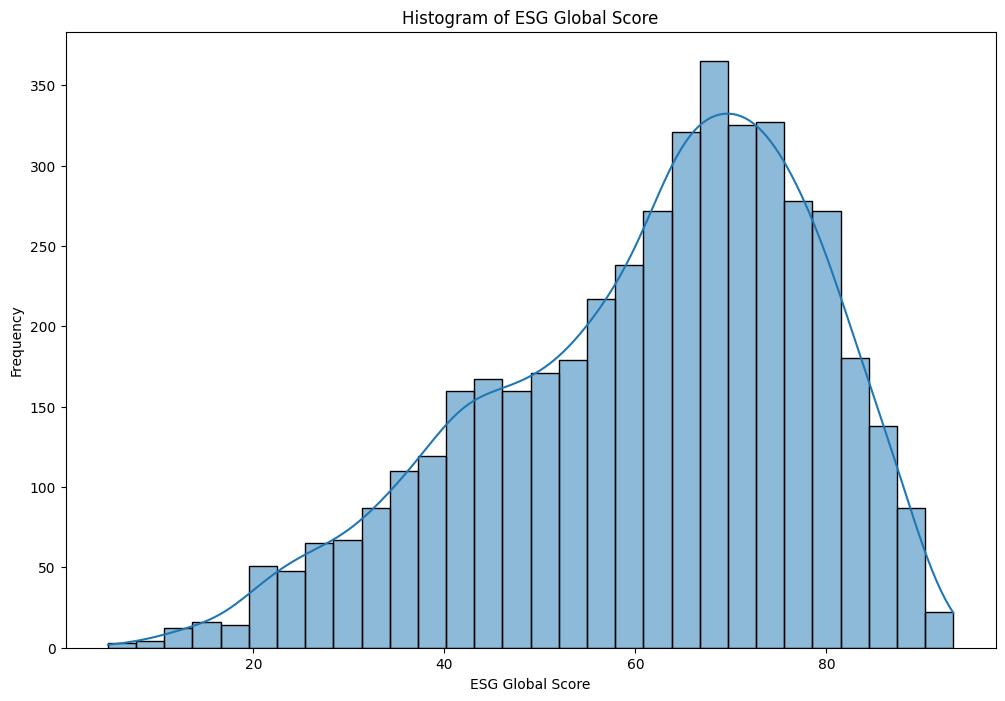

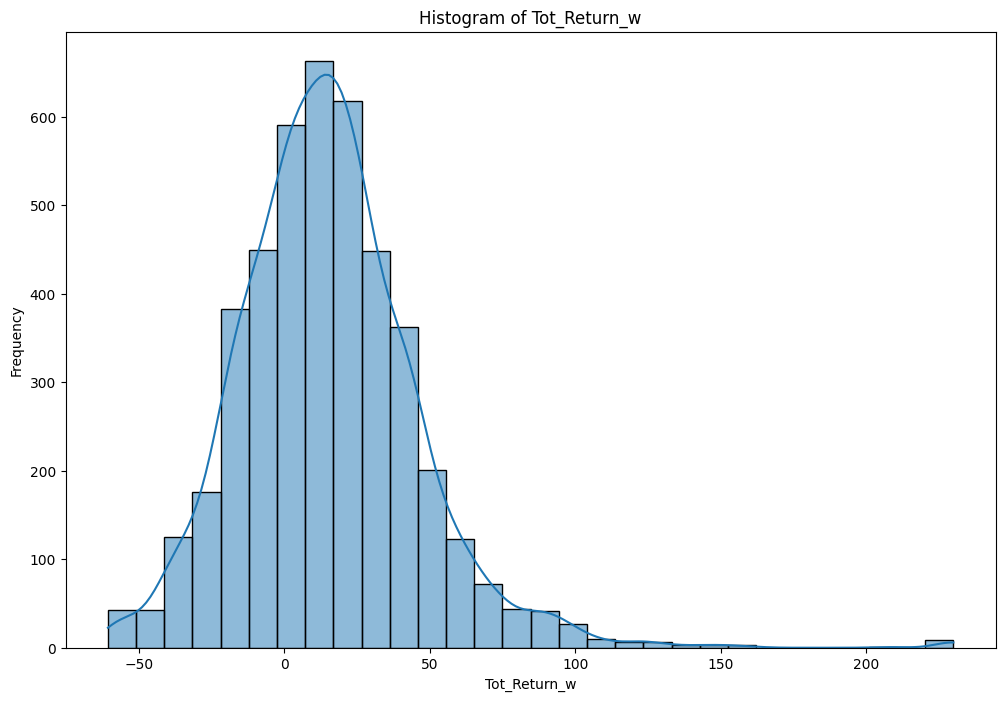

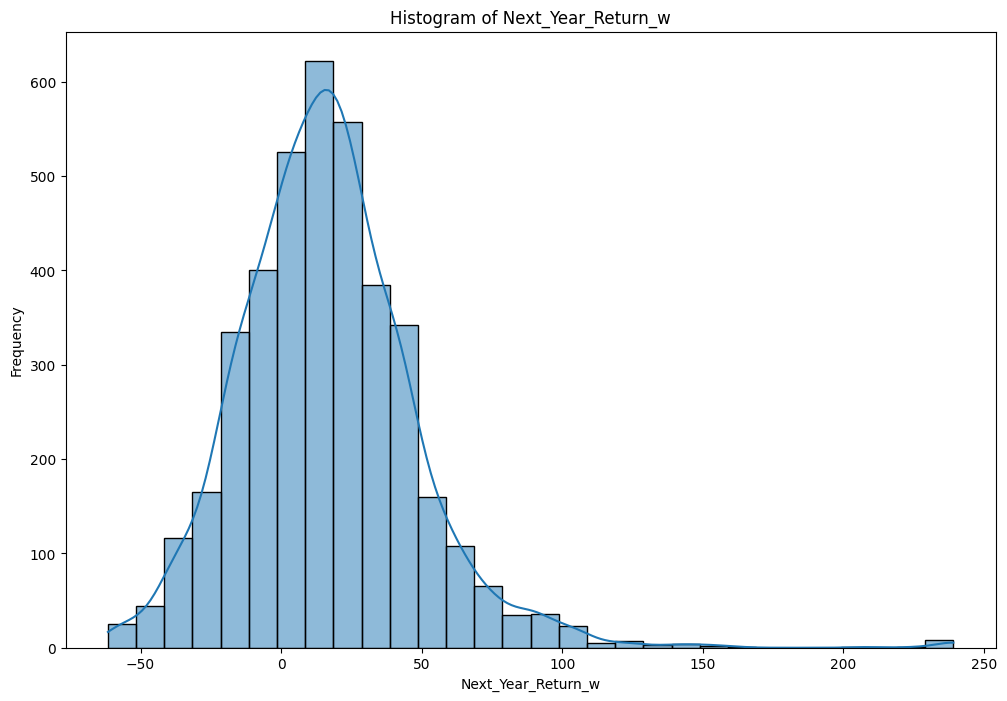

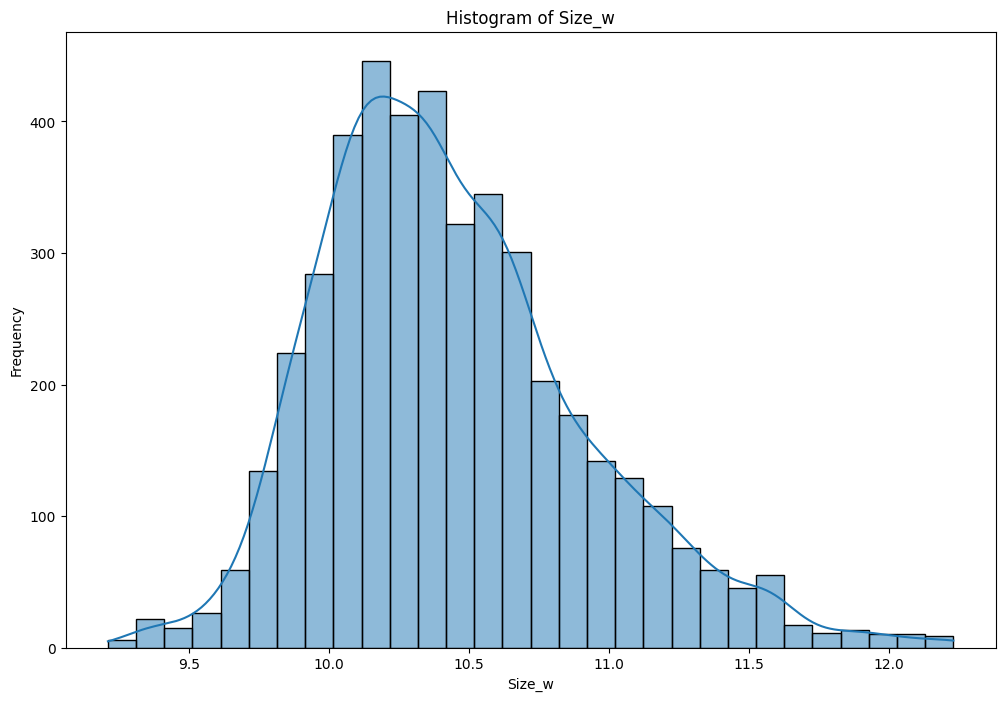

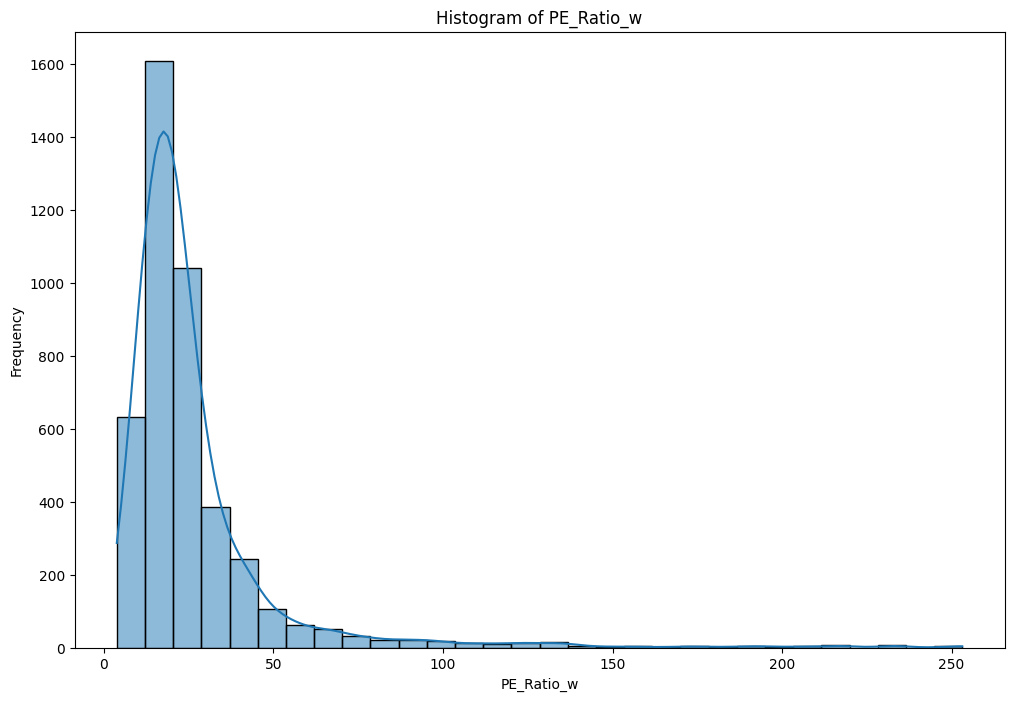

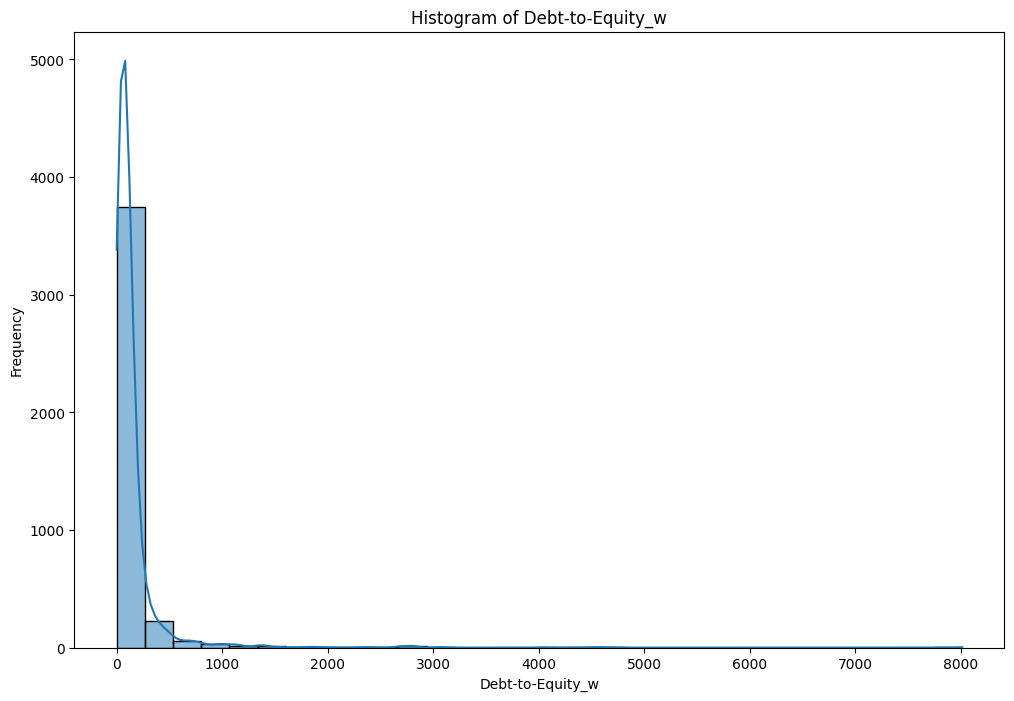

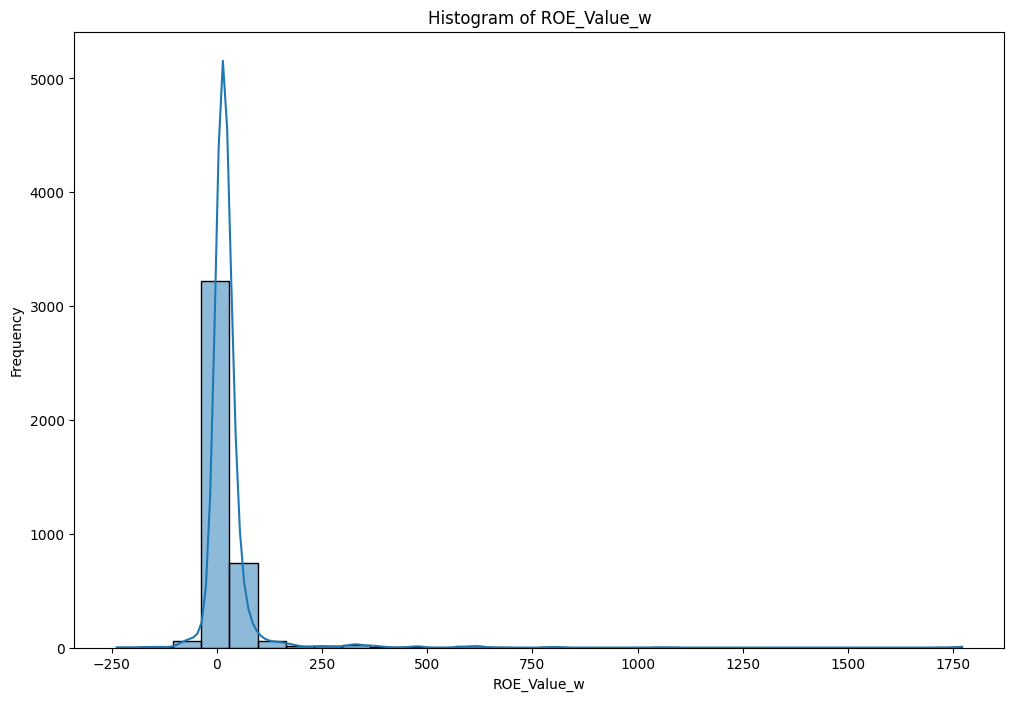

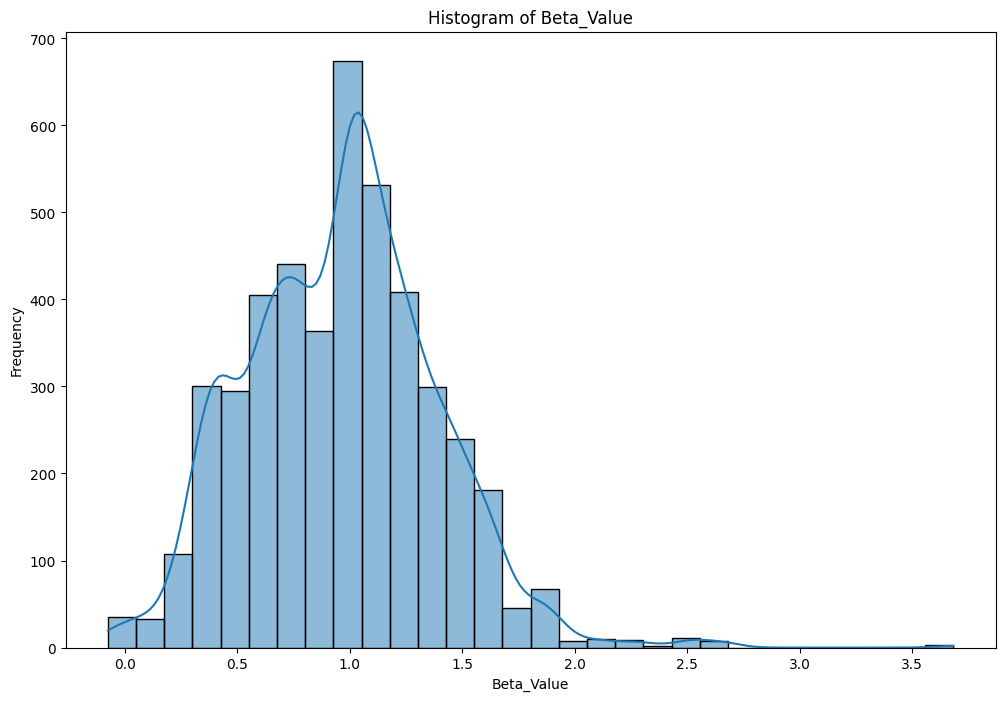

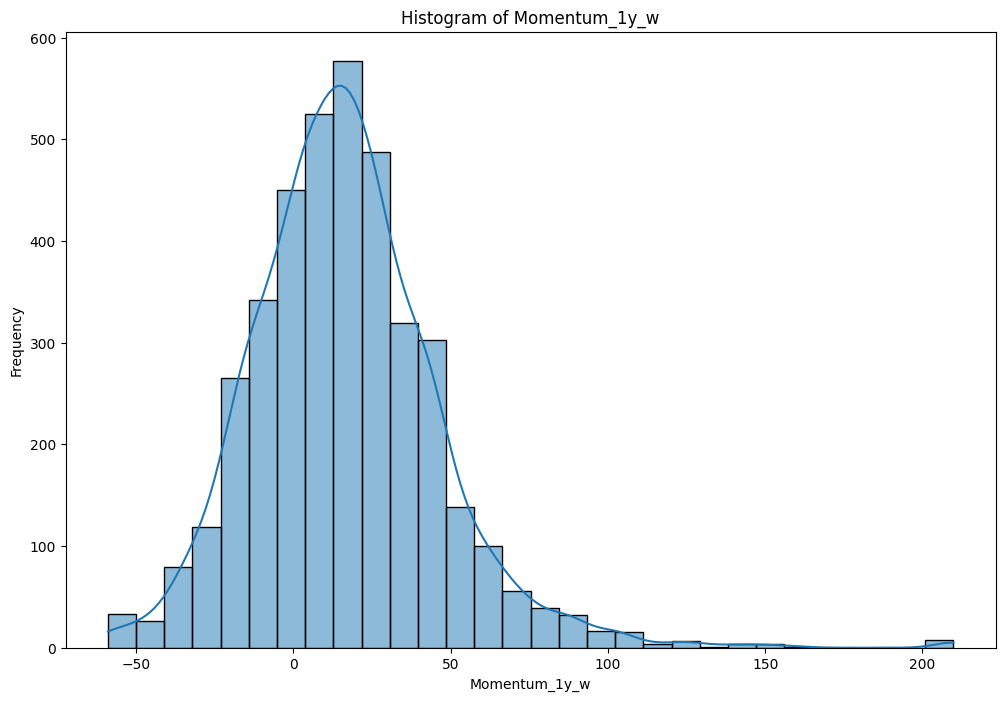

In [20]:
#Histograms

cols = ["ESG Global Score", "Tot_Return_w", "Next_Year_Return_w", "Size_w", "PE_Ratio_w", "Debt-to-Equity_w", "ROE_Value_w", "Beta_Value", "Momentum_1y_w"]
for col in cols:
    plt.figure(figsize=(12, 8))
    sns.histplot(data[col].dropna(), bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

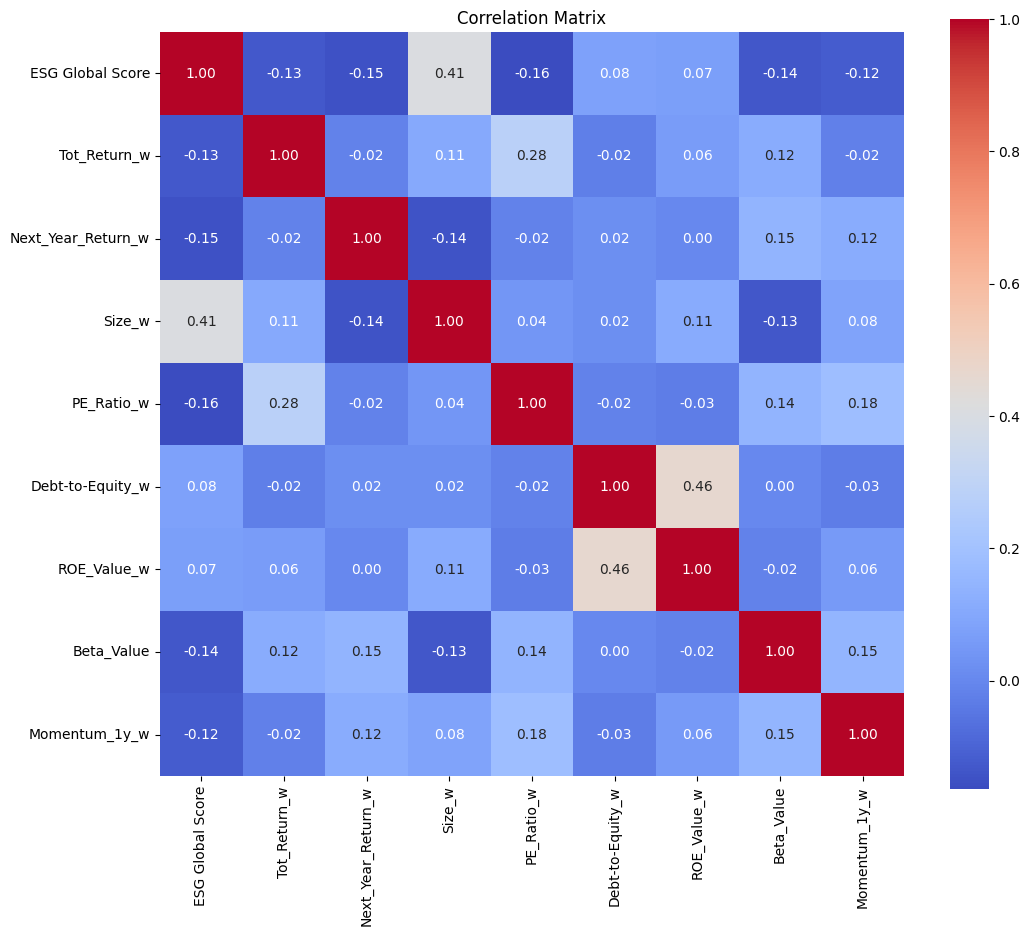

In [9]:
#Now we can proceed with correlation analysis using the winzorized variables

corr_matrix = data[["ESG Global Score", "Tot_Return_w", "Next_Year_Return_w", "Size_w", "PE_Ratio_w", "Debt-to-Equity_w", "ROE_Value_w", "Beta_Value", "Momentum_1y_w"]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [6]:
#Let's Analyze ESG Global Score Per Sector and Total Return per Sector

data.groupby("Sector")["ESG Global Score"].mean().sort_values(ascending=False)

Sector
Basic Materials           68.750918
Materials                 68.280720
Consumer Defensive        68.053621
Consumer Staples          67.419340
Healthcare                65.624877
Real Estate               64.854293
Consumer Discretionary    63.239167
Utilities                 63.014402
Financial Services        62.368648
Energy                    61.633911
Industrials               59.332361
Consumer Cyclical         58.989677
Technology                57.754917
Communication Services    52.036012
Industry                  50.506952
Financials                50.334468
Name: ESG Global Score, dtype: float64

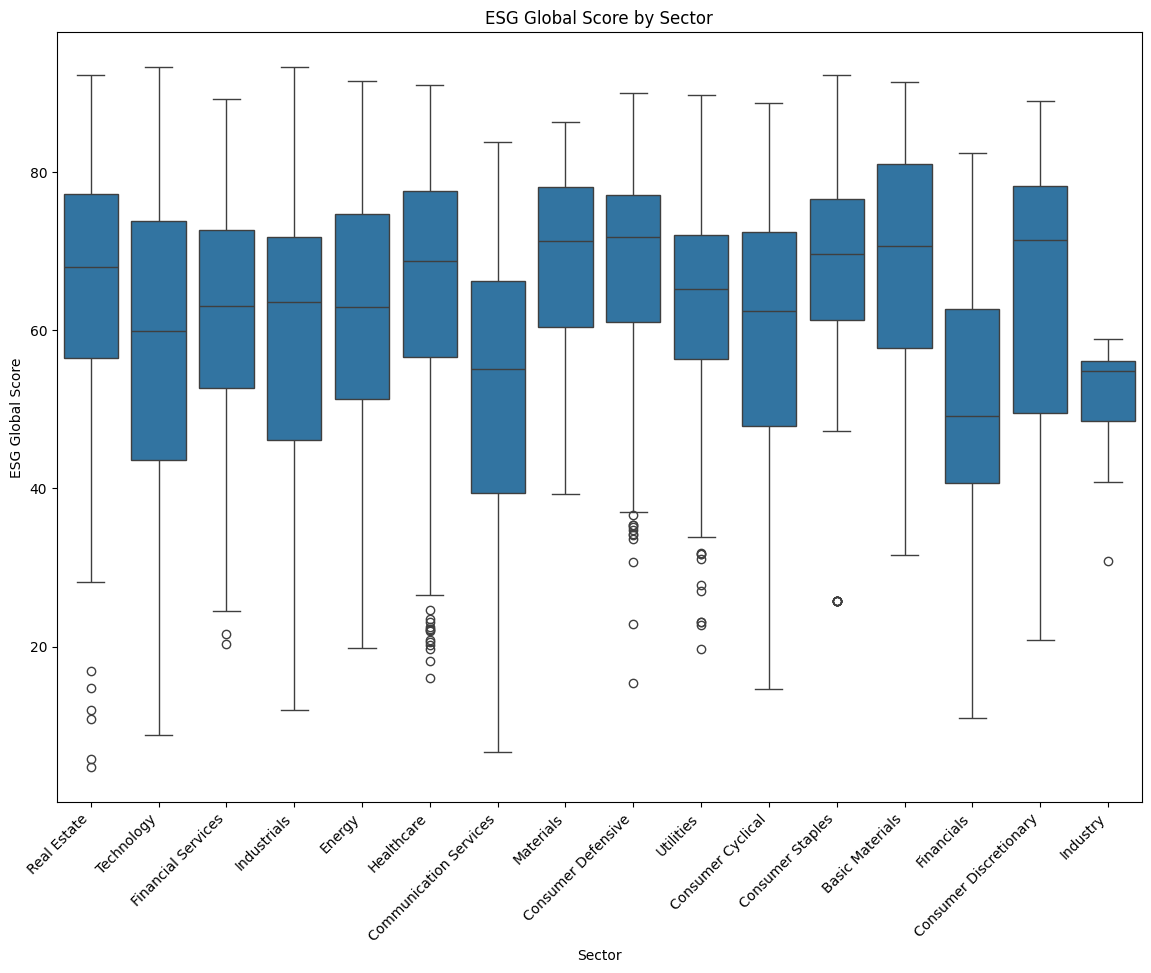

In [ ]:

plt.figure(figsize=(14, 10))
sns.boxplot(x="Sector", y="ESG Global Score", data=data)
plt.xticks(rotation=45, ha='right')
plt.title("ESG Global Score by Sector")
plt.ylabel("ESG Global Score")
plt.xlabel("Sector")
plt.show()

In [24]:
data.groupby("Sector")["Tot_Return_w"].mean().sort_values(ascending=False)

Sector
Technology                24.792924
Industry                  19.610317
Basic Materials           16.059959
Financials                15.134160
Healthcare                14.508514
Consumer Cyclical         14.322558
Energy                    13.557856
Industrials               13.389665
Financial Services        13.233297
Communication Services    12.924694
Real Estate               11.263232
Consumer Staples          10.701127
Materials                 10.452668
Consumer Defensive        10.398065
Utilities                 10.322573
Consumer Discretionary     9.027581
Name: Tot_Return_w, dtype: float64

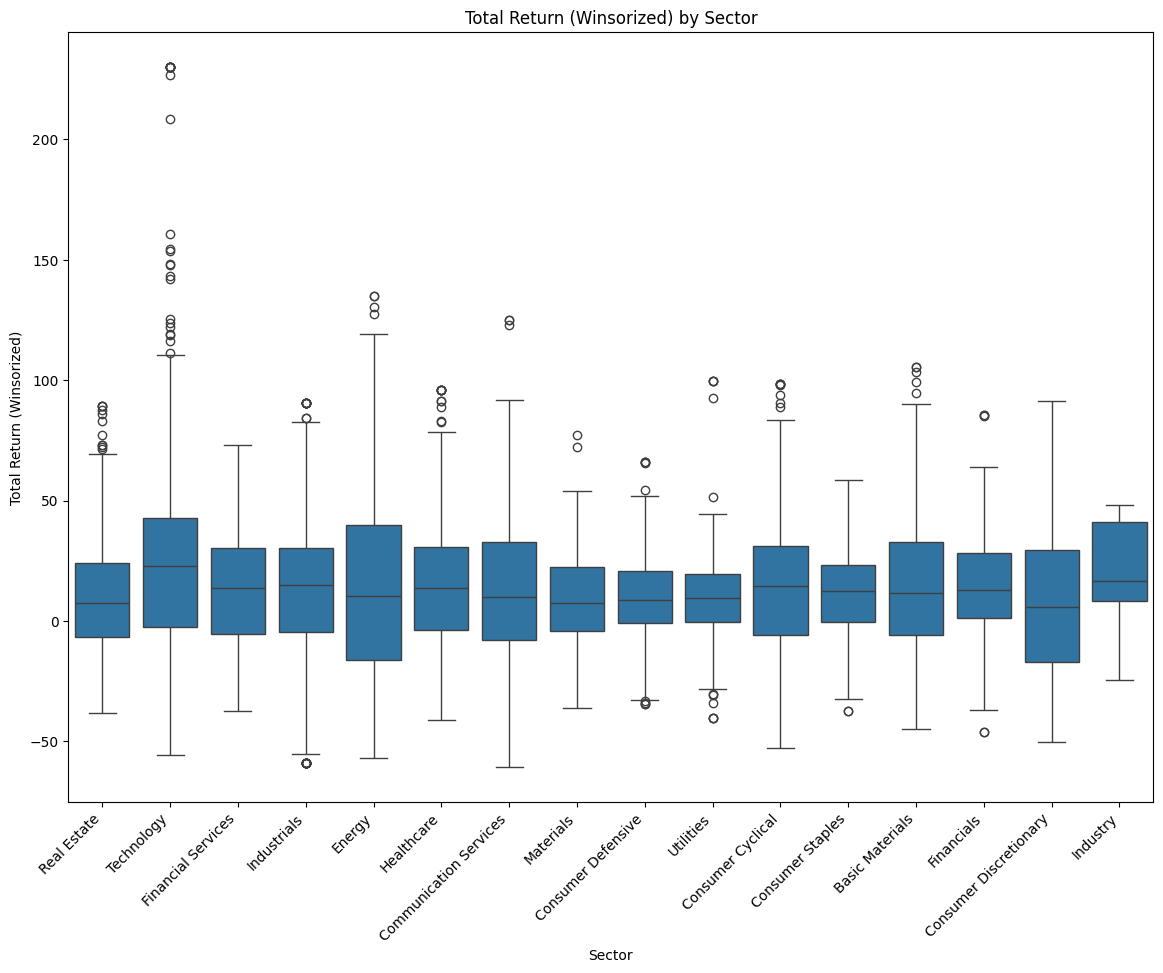

In [25]:
plt.figure(figsize=(14, 10))
sns.boxplot(x="Sector", y="Tot_Return_w", data=data)
plt.xticks(rotation=45, ha='right')
plt.title("Total Return (Winsorized) by Sector")
plt.ylabel("Total Return (Winsorized)")
plt.xlabel("Sector")
plt.show()

In [11]:
#Analysis of high impact sectors in ESG

data.groupby("High_Impact_ESG")["ESG Global Score"].mean().sort_values(ascending=False)

High_Impact_ESG
1    61.604626
0    60.972188
Name: ESG Global Score, dtype: float64

In [11]:
data.groupby("High_Impact_ESG")["Tot_Return_w"].mean().sort_values(ascending=False)

High_Impact_ESG
0    16.948309
1    12.793949
Name: Tot_Return_w, dtype: float64

In [7]:
#Now I will do the regression analysis

reg1 = smf.ols(formula="Tot_Return_w ~ Q('ESG Global Score')", data=data).fit()

print(reg1.summary())




                            OLS Regression Results                            
Dep. Variable:           Tot_Return_w   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     75.22
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           5.81e-18
Time:                        16:21:17   Log-Likelihood:                -21454.
No. Observations:                4435   AIC:                         4.291e+04
Df Residuals:                    4433   BIC:                         4.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                29.32

In [13]:
reg2 = smf.ols(formula="Tot_Return_w ~ Q('ESG Global Score') + Size + PE_Ratio_w +  Momentum_1y_w +  ROE_Value_w + Q('Debt-to-Equity_w')", data=data).fit()

print(reg2.summary())
reg2_latex = reg2.summary().as_latex()
with open("/files/capstone_project/reg2.tex", "w") as f:
    f.write(reg2_latex)


                            OLS Regression Results                            
Dep. Variable:           Tot_Return_w   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     81.96
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           3.08e-96
Time:                        14:44:51   Log-Likelihood:                -16615.
No. Observations:                3489   AIC:                         3.324e+04
Df Residuals:                    3482   BIC:                         3.329e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -67.89

In [21]:
reg3 = smf.ols(formula= "Tot_Return_w ~ Q('ESG Global Score') + High_Impact_ESG + Q('ESG Global Score'):High_Impact_ESG + Size + PE_Ratio_w +  Momentum_1y_w +  ROE_Value_w + Q('Debt-to-Equity_w')", data=data).fit()

print(reg3.summary())
reg3_latex = reg3.summary().as_latex()
with open("/files/capstone_project/reg3.tex", "w") as f:
    f.write(reg3_latex)

                            OLS Regression Results                            
Dep. Variable:           Tot_Return_w   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     63.11
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           7.72e-97
Time:                        15:03:14   Log-Likelihood:                -16609.
No. Observations:                3489   AIC:                         3.324e+04
Df Residuals:                    3480   BIC:                         3.329e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [14]:
#Now We want to see if the effect of ESG is stable over the years, so we will do the Fama-MacBeth regression analysis. To do this, I asked ChatGPT to help me with the code below:

def fama_macbeth(data, formula, year_col="Year", min_firms=50):
    years = sorted(data[year_col].unique())
    betas = []
    used_years = []

    for y in years:
        sub = data[data[year_col] == y].dropna()
        if len(sub) < min_firms:
            continue  # pas assez d'observations cette année
        res = smf.ols(formula=formula, data=sub).fit()
        betas.append(res.params)
        used_years.append(y)

    betas = pd.DataFrame(betas, index=used_years)  # lignes = années, colonnes = coefficients

    # moyenne FM
    beta_mean = betas.mean(axis=0)
    # écart-type des betas au cours du temps
    beta_std = betas.std(axis=0, ddof=1)
    T = len(betas)

    se = beta_std / np.sqrt(T)
    t_stats = beta_mean / se

    fm_table = pd.DataFrame({
        "beta_mean": beta_mean,
        "fm_se": se,
        "fm_t": t_stats
    })

    return fm_table, betas




In [15]:
#With ESG alone

fm1_table, fm1_betas = fama_macbeth(data, formula="Tot_Return_w ~ Q('ESG Global Score')")
print(fm1_table)


                       beta_mean     fm_se      fm_t
Intercept              28.391117  6.491943  4.373285
Q('ESG Global Score')  -0.217102  0.073525 -2.952777


In [ ]:
#With ESG and controls
fm2_table, fm2_betas = fama_macbeth(data, formula="Tot_Return_w ~ Q('ESG Global Score') + Size + PE_Ratio_w +  Momentum_1y_w +  ROE_Value_w + Q('Debt-to-Equity_w') + High_Impact_ESG")
print(fm2_table)




                       beta_mean      fm_se      fm_t
Intercept             -28.330229  14.907813 -1.900361
Q('ESG Global Score')  -0.236400   0.057353 -4.121833
Size                    7.465663   2.579295  2.894459
PE_Ratio_w              0.254388   0.047204  5.389151
Momentum_1y_w          -0.107027   0.078113 -1.370150
ROE_Value_w             0.127973   0.065230  1.961879
Q('Debt-to-Equity_w')  -0.004735   0.002355 -2.010890
High_Impact_ESG       -28.330229  14.907813 -1.900361


In [ ]:
#With ESG and interactive variable

fm3_table, fm3_betas = fama_macbeth(data, formula="Tot_Return_w ~ Q('ESG Global Score') + High_Impact_ESG + Q('ESG Global Score'):High_Impact_ESG + Size + PE_Ratio_w +  Momentum_1y_w +  ROE_Value_w + Q('Debt-to-Equity_w')")
print(fm3_table)



                                       beta_mean      fm_se      fm_t
Intercept                             -28.330229  14.907813 -1.900361
Q('ESG Global Score')                  -0.118200   0.028677 -4.121833
High_Impact_ESG                       -28.330229  14.907813 -1.900361
Q('ESG Global Score'):High_Impact_ESG  -0.118200   0.028677 -4.121833
Size                                    7.465663   2.579295  2.894459
PE_Ratio_w                              0.254388   0.047204  5.389151
Momentum_1y_w                          -0.107027   0.078113 -1.370150
ROE_Value_w                             0.127973   0.065230  1.961879
Q('Debt-to-Equity_w')                  -0.004735   0.002355 -2.010890
